In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("covid19_tweets.csv")

In [4]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [5]:
data1 = data[['user_name','user_location','date','text']]

In [6]:
data1.head()

,user_name,user_location,date,text
0,ᏉᎥ☻լꂅϮ,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [7]:
data1.user_name = data1.user_name.astype('category') 

C:\Users\Bhavanshu Arora\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   user_name      179108 non-null  category
 1   user_location  142337 non-null  object  
 2   date           179108 non-null  object  
 3   text           179108 non-null  object  
dtypes: category(1), object(3)
memory usage: 8.0+ MB


In [9]:
data1.user_name = data1.user_name.cat.codes

In [10]:
data1.head()

,user_name,user_location,date,text
0,89755,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,76403,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,18398,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [11]:
texts = data['text']

In [12]:
texts

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [13]:
import re
rem_url = lambda x : re.sub(r'^https\S+','',x)

In [14]:
#remove_url
texts_url = texts.apply(rem_url)

In [15]:
texts_url

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [16]:
#remove lower case
lower_case = lambda x : x.lower()

In [17]:
texts_url_lc = texts_url.apply(lower_case)
texts_url_lc

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104    2020! the year of insanity! lol! #covid19 http...
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

In [18]:
#remove puntuactions/special characters
remove_puntuations = lambda x: re.sub(r'[^\w\s]','',x)
texts_url_lc_pun = texts_url_lc.apply(remove_puntuations)
texts_url_lc_pun

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104    2020 the year of insanity lol covid19 httpstco...
179105    ctvnews a powerful painting by juan lucena its...
179106    more than 1200 students test positive for covi...
179107    i stop when i see a stop\n\nsabcnews\nizindaba...
Name: text, Length: 179108, dtype: object

'Remove stop words'

In [79]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('English'))

In [80]:
more_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words.update(more_words)
stop_words

{'#coronavirus',
 '#coronavirusPandemic',
 '#coronavirusoutbreak',
 '#covid19',
 '#covid_19',
 '#epitwitter',
 '#ihavecorona',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'coronavirus',
 'couldn',
 "couldn't",
 'covid',
 'covid19',
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 '

In [81]:
#tokenizing - word tokenizers, sentence tokenizers
#from nltk.tokenize import word_tokenize


In [82]:
#remove_text = lambda x: word_tokenize(x) //it returns a list whoch creates a problem later
#remove_text = lambda x: ''.join(x)
#texts_url_lc_pun_token = texts_url_lc_pun.apply(remove_text)
#texts_url_lc_pun_token

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104    2020 the year of insanity lol covid19 httpstco...
179105    ctvnews a powerful painting by juan lucena its...
179106    more than 1200 students test positive for covi...
179107    i stop when i see a stop\n\nsabcnews\nizindaba...
Name: text, Length: 179108, dtype: object

In [83]:
type(texts_url_lc_pun)

pandas.core.series.Series

In [100]:
rem_stopwords = lambda x: ' '.join([word for word in x.split() if  word not in stop_words])

In [101]:
texts_url_lc_pun_token_rs = texts_url_lc_pun_token.apply(rem_stopwords)

In [102]:
#texts_url_lc_pun_token_rs.toString()
type(texts_url_lc_pun_token_rs)

pandas.core.series.Series

In [103]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment = lambda x: sia.polarity_scores(x)

In [104]:
data1.text = texts_url_lc_pun_token_rs


C:\Users\Bhavanshu Arora\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [105]:
data1.head()

,user_name,user_location,date,text
0,89755,astroworld,2020-07-25 12:27:21,smelled scent hand sanitizers today someone pa...
1,76403,"New York, NY",2020-07-25 12:27:17,hey yankees yankeespr mlb wouldnt made sense p...
2,76147,"Pewee Valley, KY",2020-07-25 12:27:14,diane3443 wdunlap realdonaldtrump trump never ...
3,84572,Stuck in the Middle,2020-07-25 12:27:10,brookbanktv one gift give appreciation simple ...
4,18398,Jammu and Kashmir,2020-07-25 12:27:08,25 july media bulletin novel coronavirusupdate...


In [106]:
type(data1.text)

pandas.core.series.Series

In [107]:
sentiment_score = data1.text.apply(sentiment)

In [110]:
sentiment_table = pd.DataFrame(data=list(sentiment_score))

In [111]:
sentiment_table

,neg,neu,pos,compound
0,0.000,0.758,0.242,0.4939
1,0.110,0.709,0.181,0.2263
2,0.000,0.832,0.168,0.2057
3,0.000,0.563,0.437,0.7351
4,0.000,0.813,0.187,0.3182
...,...,...,...,...
179103,0.000,0.625,0.375,0.4939
179104,0.389,0.316,0.295,-0.2263
179105,0.234,0.584,0.182,-0.2023
179106,0.000,0.690,0.310,0.5574


In [124]:
analysis = lambda x: 'neutral' if x==0 else ('positive' if x>0 else 'negative') 

In [125]:
report = sentiment_table.compound.apply(analysis)

In [126]:
sentiment_table['report'] = report

In [127]:
sentiment_table

,neg,neu,pos,compound,report
0,0.000,0.758,0.242,0.4939,positive
1,0.110,0.709,0.181,0.2263,positive
2,0.000,0.832,0.168,0.2057,positive
3,0.000,0.563,0.437,0.7351,positive
4,0.000,0.813,0.187,0.3182,positive
...,...,...,...,...,...
179103,0.000,0.625,0.375,0.4939,positive
179104,0.389,0.316,0.295,-0.2263,negative
179105,0.234,0.584,0.182,-0.2023,negative
179106,0.000,0.690,0.310,0.5574,positive


In [137]:
count = pd.DataFrame(sentiment_table.report.value_counts().reset_index())
count


,index,report
0,positive,71218
1,neutral,60188
2,negative,47702


<BarContainer object of 3 artists>

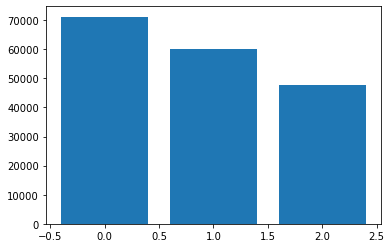

In [138]:
import matplotlib.pyplot as plt
plt.bar(count.index,count.report)

Add more visualization